In [1]:
import pandas as pd
import os 
import glob
import seaborn as sns
import matplotlib.pyplot as plt


s	float (seconds)	Running time in seconds

h:m:s	string (-)	Running time in hour, minutes, seconds format

max_rss	float (MB)	Maximum "Resident Set Size”, this is the non-swapped physical memory a process has used.

max_vms	float (MB)	Maximum “Virtual Memory Size”, this is the total amount of virtual memory used by the process

max_uss	float (MB)	“Unique Set Size”, this is the memory which is unique to a process and which would be freed if the process was terminated right now.

max_pss	float (MB)	“Proportional Set Size”, is the amount of memory shared with other processes, accounted in a way that the amount is divided evenly between the processes 
that share it (Linux only)

io_in	float (MB)	the number of MB read (cumulative).

io_out	float (MB)	the number of MB written (cumulative).

mean_load	float (-)	CPU usage over time, divided by the total running time (first row)

cpu_time	float(-)	CPU time summed for user and system

In [2]:
def readable_benchmark(df):
    df['max_rssKB'] = df['max_rss'] / 1024
    df['max_vmsKB']  = df['max_vms'] / 1024
    df['max_ussKB'] = df['max_uss'] / 1024
    df['max_pssKB'] = df['max_pss'] / 1024
    df['io_inMB'] = df['io_in'] 
    df['io_outMB'] = df['io_out'] 
    df['mean_loadMB'] = df['mean_load'] 

    df['runningtimeMIN'] = df['s']/ 60

    seconds = int(df['cpu_time'])
    hours, remainder = divmod(seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    time_readable_CPU = f'{hours}:{minutes:02}:{seconds:02}'

    df['cpu_time'] = time_readable_CPU

    df = df.drop(['s','max_rss', 'max_vms', 'max_uss', 'max_pss', 'io_in',
           'io_out', 'mean_load'], axis=1)
    return df

In [3]:
pattern = os.path.join('/home/tbellagio/scratch/slim_grenenet/benchmarks', '**', '*.txt')

benchmark_files = glob.glob(pattern, recursive=True)

In [4]:
all_benchmarks = dict()
for i in benchmark_files:

    df = pd.read_csv(i, sep = '\t')

    df = readable_benchmark(df)

    df['model'] = i.split('benchmarks/')[1].replace('.txt', '').split('/')[0]
    df['details'] =  i.split('benchmarks/')[1].replace('.txt', '').split('/')[1]
    
    all_benchmarks[i] = df

In [5]:
all_benchmarks = pd.concat(all_benchmarks).reset_index(drop=True)

<AxesSubplot:xlabel='runningtimeMIN', ylabel='Count'>

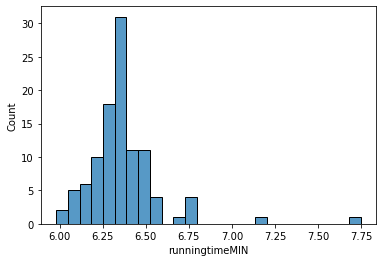

In [14]:
sns.histplot(all_benchmarks[all_benchmarks['model'] == 'lmm_nopc10env']['runningtimeMIN'] / 60)

In [13]:
460/60

7.666666666666667

In [15]:
60*8

480

<AxesSubplot:xlabel='model', ylabel='runningtimeMIN'>

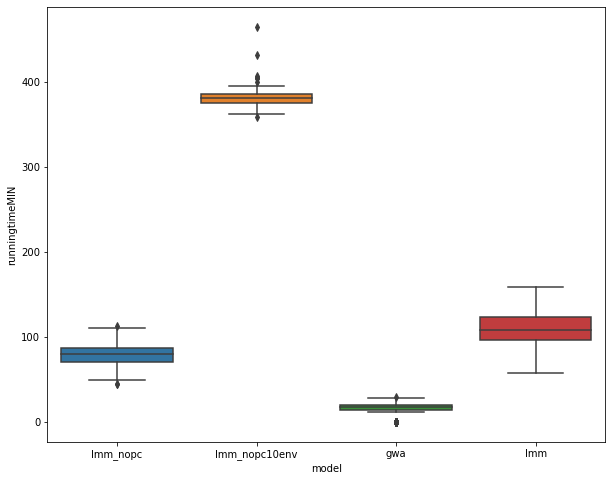

In [6]:
plt.figure(figsize=(10,8))  # set plot size (denoted in inches)
sns.boxplot(data = all_benchmarks, y = 'runningtimeMIN', x = 'model')

<AxesSubplot:xlabel='model', ylabel='max_vmsKB'>

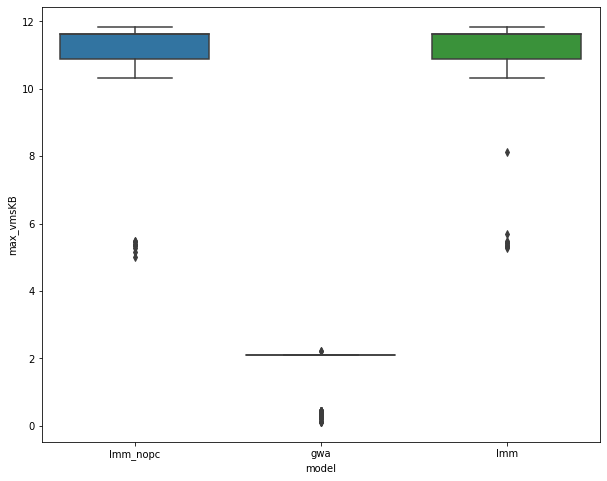

In [103]:
plt.figure(figsize=(10,8))  # set plot size (denoted in inches)
sns.boxplot(data = all_benchmarks, y = 'max_vmsKB', x = 'model')

<AxesSubplot:xlabel='model', ylabel='mean_loadMB'>

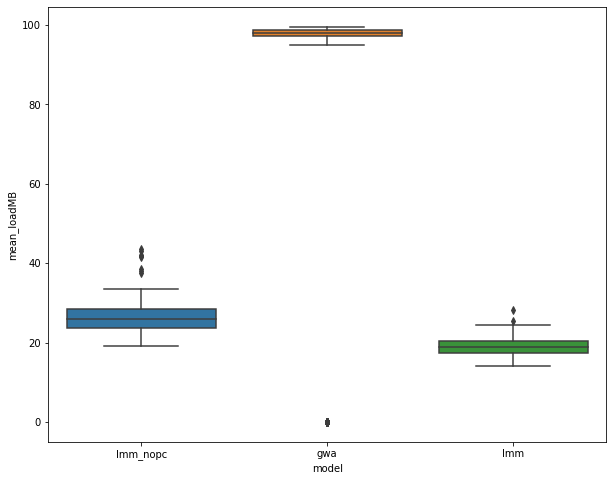

In [104]:
plt.figure(figsize=(10,8))  # set plot size (denoted in inches)
sns.boxplot(data = all_benchmarks, y = 'mean_loadMB', x = 'model')